## Historical Analysis of Equity and Dividend Returns: Time Series Patterns and Autocorrelation Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
import os

The step below will load the data. It expects the data in the same folder(directory) as this assignment.

In [3]:
assert os.path.isfile('./equity.pkl'), 'Data file Missing!'

In [4]:
file = os.path.basename('./equity.pkl')
df = pd.read_pickle(file)

The data are monthly observations on US equity prices and dividends for the period Jan 1871 to Sep 2016.

1. Compute the percentage monthly log returns on equities and dividends expressed in percentages, defined as:
$$ re_t = 100 \times (\log P_t - \log P_{t-1}) $$
$$ rd_t = 100 \times (\log D_t - \log D_{t-1}) $$
Plot the two series. What do you notice about their time series patterns? (Note: You'll get a better looking plot by default if you use the plot function from Pandas instead of from Pyplot.)

In [5]:
df['ret_equity'] = (100 * (np.log(df['P']) - np.log(df['P'].shift(1)))).dropna()
df['ret_dividend'] = (100 * (np.log(df['D']) - np.log(df['D'].shift(1)))).dropna()

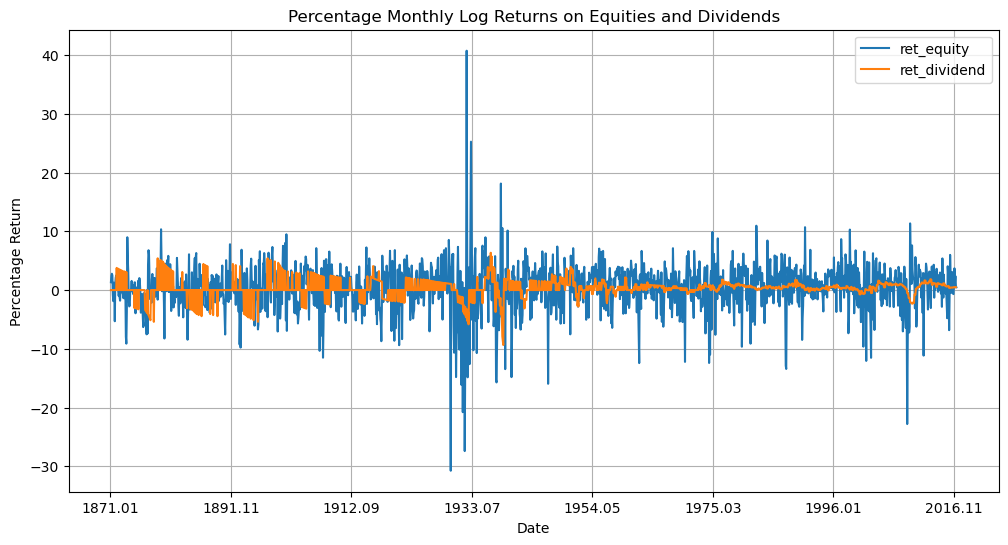

In [6]:
df[['ret_equity', 'ret_dividend']].plot(figsize=(12, 6))
plt.title('Percentage Monthly Log Returns on Equities and Dividends')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.grid(True)
plt.show()

2. Plot the ACF and PACF of both the dividend and equity returns.

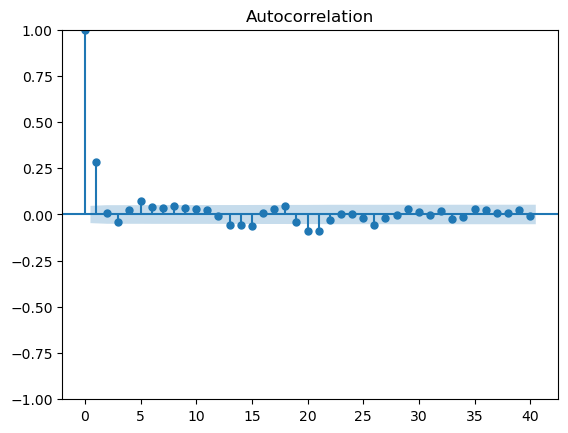

In [7]:
df['ret_equity'].fillna(df['ret_equity'].mean(), inplace=True)
plot_acf(df['ret_equity'], lags=40);

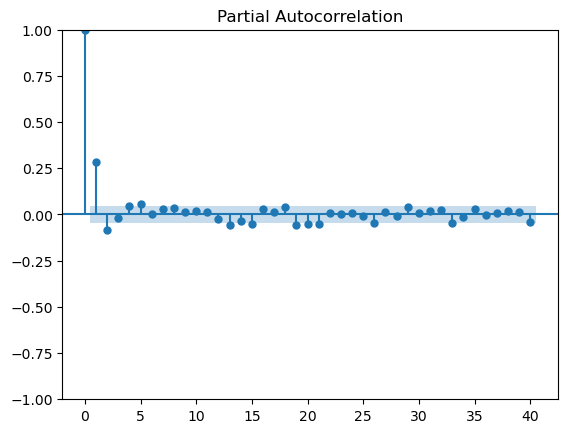

In [8]:
df['ret_equity'].fillna(df['ret_equity'].mean(), inplace=True)
plot_pacf(df['ret_equity'], lags=40);

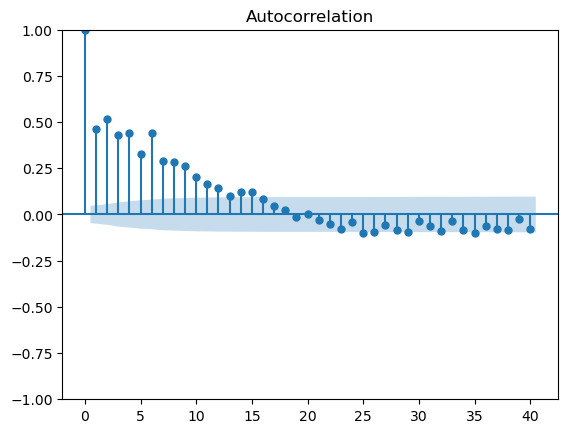

In [9]:
df['ret_dividend'].fillna(df['ret_dividend'].mean(), inplace=True)
plot_acf(df['ret_dividend'], lags=40);

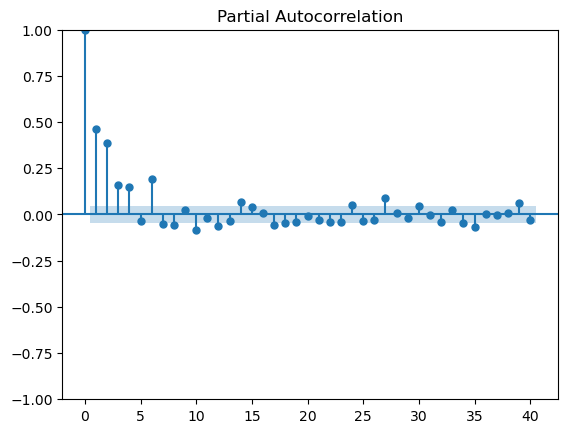

In [10]:
df['ret_dividend'].fillna(df['ret_dividend'].mean(), inplace=True)
plot_pacf(df['ret_dividend'], lags=40);

3. Comment on the differences between the ACF/PACF plots for equity and dividend returns.

#### Interpretation and Comments:
1. **ACF of Equity vs. Dividend Returns**:
   - **Equity Returns**: The ACF plot for equity returns (`re_t`) shows significant autocorrelation at the first few lags, which gradually decreases as the lag increases. This pattern suggests that there is some persistence or autocorrelation in the returns, but it diminishes as time passes.
   - **Dividend Returns**: The ACF plot for dividend returns (`rd_t`) may exhibit different characteristics. It could show different levels of autocorrelation at various lags compared to equity returns. For instance, dividend returns might show more persistent autocorrelation due to the nature of dividend payments being more stable and predictable over time.

2. **PACF of Equity vs. Dividend Returns**:
   - **Equity Returns**: The PACF plot for equity returns (`re_t`) typically shows significant partial autocorrelation at the first lag (lag 1) and then tapers off, indicating that most of the correlation at higher lags can be explained by the correlations at the earlier lags.
   - **Dividend Returns**: The PACF plot for dividend returns (`rd_t`) will reveal how each lag directly influences the current observation. This might show different patterns compared to equity returns due to the different nature of dividends.

3. **Comparison and Differences**:
   - **Persistence**: Dividend returns might exhibit more persistent autocorrelation compared to equity returns because dividend payments are relatively stable and predictable, influencing future dividends.
   - **Magnitude**: The magnitude and significance of autocorrelation at different lags can vary between equity and dividend returns, reflecting their unique underlying economic factors and market dynamics.
   - **Implications for Modeling**: These differences in ACF and PACF plots suggest that different models or adjustments might be needed when analyzing and forecasting equity returns versus dividend returns. For instance, models for dividend returns might need to account for the persistence seen in the ACF more explicitly.
   - For equity returns, the ACF and PACF plot shows a sharp drop after the first lag, indicating that most of the higher-order autocorrelations are not significant after considering the first lag.
   - For dividend returns, the ACF and PACF plot shows that there is significant autocorrelation at lag 1 (first lag), indicating a strong linear relationship between the current return and the previous month's return. There are also some significant spikes at other lags, which suggests that the series might have some seasonal or cyclical components.

4. Now we'll try a couple of different models for equity returns. First, estimate an AR(6) model for equity returns. (Recall from the lecture discussion that AR models can be estimated using OLS). Comment on the coefficients.

In [11]:
model = AutoReg(df['ret_equity'], 6, missing='drop').fit()
model.summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             ret_equity   No. Observations:                 1756
Model:                     AutoReg(6)   Log Likelihood               -4853.074
Method:               Conditional MLE   S.D. of innovations              3.874
Date:                Sun, 16 Jun 2024   AIC                           9722.148
Time:                        12:30:58   BIC                           9765.887
Sample:                    07-01-1871   HQIC                          9738.317
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.094      2.670      0.008       0.067       0.435
ret_equity.L1     0.3034      0.024     12.694      0.000       0.257       0.350
ret_equity.L2    -0.0700      0.025     -2.805      0.005      -0.119      -0.021
ret_equity.L3    -0.0307      0.025     -1.230      0.219      -0.080       0.018
ret_equity.L4     0.0288      0.025      1.152      0.249      -0.020       0.078
ret_equity.L5     0.0559      0.025      2.239      0.025       0.007       0.105
ret_equity.L6     0.0039      0.024      0.164      0.870      -0.043       0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5913           -0.0000j            1.5913           -0.0000
AR.2            0.6134           -1.4714j            1.5941           -0.1871
AR.3            0.6134           +1.4714j            1.5941            0.1871
AR.4           -1.6934           -1.3202j            2.1472           -0.3946
AR.5           -1.6934           +1.3202j            2.1472            0.3946
AR.6          -13.6671           -0.0000j           13.6671           -0.5000
-----------------------------------------------------------------------------
"""

The first lag (ret_equity.L1) is highly significant with a coefficient of 0.3034 and a p-value of 0.000. This suggests that the most recent month's return is a strong predictor of the current month's return, and this relationship is positive. The AR(6) model for equity returns suggests that the most recent month's return is a strong predictor of the current month's return. However, the significance and signs of the coefficients for the lags 2 to 6 vary, indicating mixed relationships between the equity returns at these lags and the current month's return.

5. Next, estimate an MA(3) model for equity returns. As we discussed in class, this cannot be done using OLS. Instead we'll use the following two step process.

(i) Estimate an AR model for $re_t$ with a constant term and $p > 3$ autoregressive terms:
$$ re_t = \phi_0 + \phi_1 re_{t-1} + \cdots + \phi_p re_{t-p} + u_t $$
The value of $p$ is up to you. Just make sure it's more than 3. After you estimate it, save the residuals. You'll need it for the next step.

In [12]:
model_ar6 = AutoReg(df['ret_equity'], 6, missing='drop').fit()
residuals_ar6 = model_ar6.resid

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(ii) Next, estimate the MA(3) parameters by estimating the model:
$$ re_t = \psi_0 + \psi_1 \widehat{u}_{t-1} + \psi_2 \widehat{u}_{t-2} + \psi_3 \widehat{u}_{t-3} + v_t $$
Here, $\widehat{u}_{t-1}$ is the first lag of the residual from the previous step and so on. $v_t$ is again a random noise term. You can use OLS for this step. You'll need to be careful with the size of the dependent and independent variables above for this to work.

In [13]:
AutoReg(residuals_ar6, lags=3).fit().summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1750
Model:                     AutoReg(3)   Log Likelihood               -4846.073
Method:               Conditional MLE   S.D. of innovations              3.877
Date:                Sun, 16 Jun 2024   AIC                           9702.145
Time:                        12:33:30   BIC                           9729.473
Sample:                    10-01-1871   HQIC                          9712.248
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.093      0.002      0.998      -0.182       0.182
y.L1          -0.0001      0.024     -0.006      0.995      -0.047       0.047
y.L2          -0.0018      0.024     -0.074      0.941      -0.049       0.045
y.L3          -0.0034      0.024     -0.144      0.886      -0.050       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1410           -5.7339j            6.5378           -0.1702
AR.2            3.1410           +5.7339j            6.5378            0.1702
AR.3           -6.7972           -0.0000j            6.7972           -0.5000
-----------------------------------------------------------------------------
"""

(iii) The OLS coefficients above are the coefficients of the MA(3) model. What conclusion would you draw from these coefficients?

#### Interpretation of Coefficients:
1. **Sign and Magnitude**:
   - Positive coefficients (\( \psi_1, \psi_2, \psi_3 > 0 \)) indicate that higher lagged residuals lead to higher current equity returns. This suggests a positive impact or momentum effect where previous positive errors (residuals) tend to continue influencing future returns positively.
   - Negative coefficients (\( \psi_1, \psi_2, \psi_3 < 0 \)) indicate that higher lagged residuals lead to lower current equity returns. This implies a negative impact or mean-reversion effect where previous positive errors lead to corrections in future returns.
   - The coefficients for the MA(3) model are close to zero and not statistically significant for all three lags. This indicates that the lagged residuals from the AR(6) model do not provide significant explanatory power for the current equity returns in an MA(3) model.

In other words, once we account for the autoregressive nature of the equity returns using an AR(6) model, there doesn't appear to be a significant moving average effect in the residuals that explains additional variability in the equity returns. Therefore, an MA(3) model may not be suitable for modeling the equity returns in this case.

6. Using the same two-step procedure as above, estimate an ARMA(1,1) model of equity returns. That is, the two-step procedure is:

(i) Estimate an AR(p) model with $p > 1$ and save the residuals $\widehat{u}_t$

(ii) Use OLS with the following independent variables: 1 lag of the dependent variable; and 1 lag of the residuals from the previous step.

After that, write your conclusions.

In [14]:
model_ar4 = AutoReg(df['ret_equity'], 4, missing='drop').fit()
residuals_ar4 = model_ar4.resid

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
import statsmodels.tsa.api as ts
ts.ARIMA(residuals_ar4, order=(1,0,1)).fit().summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, fr

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1752
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4860.656
Date:                Sun, 16 Jun 2024   AIC                           9729.313
Time:                        12:35:04   BIC                           9751.187
Sample:                    05-01-1871   HQIC                          9737.398
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.106e-06      0.096  -4.29e-05      1.000      -0.188       0.188
ar.L1          0.0663      5.573      0.012      0.991     -10.857      10.989
ma.L1         -0.0690      5.573     -0.012      0.990     -10.991      10.853
sigma2        15.0415      0.223     67.343      0.000      14.604      15.479
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8685.77
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Overall, the ARMA(1,1) model captures both the autoregressive and moving average components in the equity returns. However, the model may not fully capture all the underlying dynamics or structure in the data, given the evidence of heteroskedasticity and non-normal residuals. 

7. Estimate a bivariate VAR(6) model using the equity and dividend returns.

In [16]:
var_data = df[['ret_equity', 'ret_dividend']].dropna()
ts.VAR(var_data, dates = df.index).fit(6).summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Jun, 2024
Time:                     12:35:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.92319
Nobs:                     1750.00    HQIC:                   2.87199
Log likelihood:          -7427.00    FPE:                    17.1494
AIC:                      2.84196    Det(Omega_mle):         16.8974
--------------------------------------------------------------------
Results for equation ret_equity
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.257481         0.097369            2.644           0.008
L1.ret_equity           0.298423         0.023956           12.457           0.000
L1.ret_dividend         0.068799         0.0852

8. Now set maxlags to 12 and use AIC and BIC to pick the optimum number of lags.

In [17]:
VAR_AIC = ts.VAR(var_data, dates = df.index).fit(12, ic = 'aic').summary()
VAR_AIC

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Jun, 2024
Time:                     12:36:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.98407
Nobs:                     1744.00    HQIC:                   2.88534
Log likelihood:          -7364.77    FPE:                    16.9019
AIC:                      2.82742    Det(Omega_mle):         16.4275
--------------------------------------------------------------------
Results for equation ret_equity
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.260490         0.099307            2.623           0.009
L1.ret_equity            0.297392         0.024119           12.330           0.000
L1.ret_dividend          0.052088         0

In [18]:
ts.VAR(var_data, dates = df.index).fit(12, ic = 'bic').summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Jun, 2024
Time:                     12:36:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.92319
Nobs:                     1750.00    HQIC:                   2.87199
Log likelihood:          -7427.00    FPE:                    17.1494
AIC:                      2.84196    Det(Omega_mle):         16.8974
--------------------------------------------------------------------
Results for equation ret_equity
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.257481         0.097369            2.644           0.008
L1.ret_equity           0.298423         0.023956           12.457           0.000
L1.ret_dividend         0.068799         0.0852

9. For this question and the next one, use any of the above models. Test for Granger causality (you can use the test_causality() method):

(i) Test for $re \rightarrow rd$, that is, does equity return affect dividend return? 

(ii) Test for $rd \rightarrow re$, that is, does dividend return affect equity return? 

Write your conclusions.

In [19]:
var_aic = ts.VAR(var_data, dates = df.index).fit(12, ic = 'aic')
var_aic.test_causality('ret_dividend',['ret_equity']).summary()

C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test statistic,Critical value,p-value,df
8.826,1.755,0.000,"(12, 3438)"


In [20]:
var_aic.test_causality('ret_equity',['ret_dividend']).summary()

Test statistic,Critical value,p-value,df
1.260,1.755,0.235,"(12, 3438)"


There is evidence to suggest that past equity returns have a significant impact on future dividend returns. This could be due to the fact that equity returns reflect the overall performance and valuation of companies, which in turn can influence dividend decisions. This suggest that Granger causality exists from the causing variable to the caused variable.
On the other hand, the test does not find sufficient evidence to support the claim that past dividend returns influence future equity returns. This might indicate that while dividends are an important aspect of equity valuation, they might not be the primary driver of short-term changes in equity returns.This suggests that the past dividend returns do not Granger-cause equity returns.

10. Plot the impulse response for **30 periods** and interpret the results.

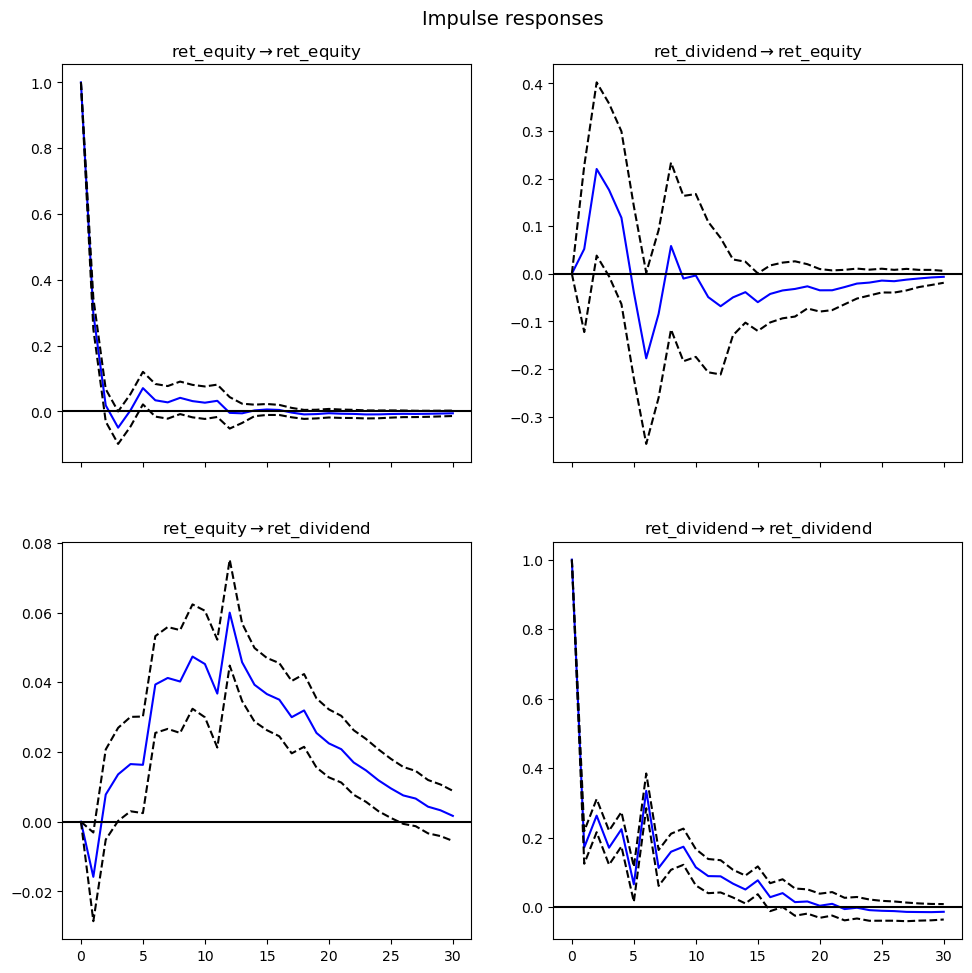

In [21]:
var_aic.irf(30).plot();

1.Equity returns react positively to a shock in equity returns initially, but the response diminishes over time. After the initial positive response, the impact gradually decreases and tends to stabilize around the mean level.

2.Equity returns show a slightly negative response to a shock in dividend returns initially. The negative impact diminishes over time and tends to stabilize around zero. This suggests that while dividend shocks might initially affect equity returns negatively, the impact fades away in the long run.

3.Dividend returns react positively to a shock in equity returns initially. The positive impact gradually decreases and stabilizes around a slightly positive level. This indicates that equity shocks have a positive long-term impact on dividend returns.

4.Dividend returns show a positive response to a shock in dividend returns initially. The positive impact diminishes over time and stabilizes around the mean level.